<span style="color: red; font-size: 2em; font-weight: bold;">Example 2</span>


Network Connections (with Arrows):

    Solar Generator → Inverter:
    bus1 (solar) → bus1 (inverter)

    Inverter → Load:
    bus2 (inverter) → bus2 (load)

    Transmission Line 1:
    solar generator → inverter (for DC power flow).

    Transmission Line 2:
    inverter → load (for AC power flow).
    
    
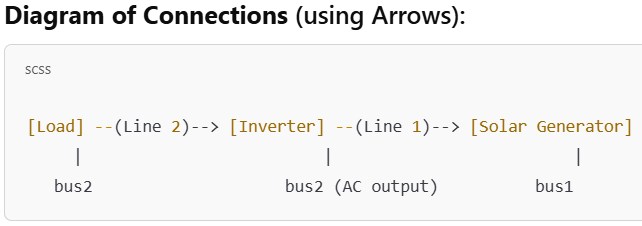

Summary of Values:
    
1 Load:

    Power Demand: 70 MW (constant AC load).
    Connected to: bus2.
    
2 Solar Generator:

    DC Power: 100 MW (variable over time).
    Connected to: bus1.
   
3 Inverter:

    Nominal Power: 100 MW (converts DC to AC).
    Connected to: bus1 (from solar generator) and bus2 (to load).
    
4 Transmission Lines:

    Line 1: Between solar generator and inverter (carrying DC).
    Line 2: Between inverter and load (carrying AC).

System Flow:

    The solar generator produces DC power at bus1.
    This DC power is sent to an inverter, which converts it to AC power.
    The AC power is sent from bus1 to bus2, where it is available for use by the load.

# Step 1: Setting Up the Environment

## Install PyPSA

In [ ]:
#!pip install pypsa

In [1]:
# Import pypsa 
import pypsa

## Additional Libraries
PyPSA may require other libraries for plotting and numerical operations:

In [2]:
# pip install numpy pandas matplotlib networkx

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Creating Your Network:

## Creating the Network

In [4]:
# Create an empty network
network = pypsa.Network()

Network: Represents the electrical network.

## Add buses

In [5]:
# Add 2 buses
network.add("Bus", "bus1", carrier="DC")  # DC side (solar generator to inverter)
network.add("Bus", "bus2", carrier="AC")  # AC side (inverter to load)

#network.buses

Bus: A bus represents a point in the system where power is injected or consumed. It’s where all electrical components (load, generator) connect.

v_nom: This is the nominal voltage of the bus. For simplicity, we set it to 20 kV.

## Add a Load
A load consumes power from the grid. Let’s add a load to Bus2 that will consume some power.

In [6]:
# Add a load to Bus 2
network.add("Load", "Load", bus="bus2", p_set=70,) 

Load: Represents a power consumer.

bus: The bus where the load is connected. # Connected to AC bus

p_set: Constant load demand (MW)

## Add a Generator: Solar Generator

In [1]:
# Define time steps for the simulation
hours = pd.date_range("2023-01-01 00:00", "2023-01-01 23:00", freq="H")
network.set_snapshots(hours)
hours

NameError: name 'pd' is not defined

In [8]:
# Generate a realistic solar profile (simple sine curve for daily pattern)
solar_profile = pd.Series(0.5 * (1 + np.sin(2 * np.pi * (hours.hour - 6) / 24)), index=network.snapshots)

# Peaks at noon

In [9]:
# Add a generator to Bus 1 

p_nom_solar = 100  # Nominal power (MW)
network.add("Generator", "Solar Generator", bus="bus1", p_nom=p_nom_solar, p_max_pu=solar_profile, carrier="solar")

Generator: Represents a generator that supplies power to the grid.

    bus: This defines which bus the generator is connected to, in this case, Bus1. Connected to DC bus

    p_nom: Nominal power capacity (MW)
    p_max_pu=solar_profile,  # Time series for solar output

## Add Inverter (as a link)

In [11]:
network.add("Link", "Inverter", bus0="bus1", bus1="bus2", p_nom=100, efficiency=0.95, carrier="inverter")

            bus0="bus1"  # DC input
            bus1="bus2"  # AC output
            p_nom=100  # Nominal power (MW)
            efficiency=0.95,  95% efficiency

# Step 3: Check results

In [14]:
# Print the network
print(network)

PyPSA Network
Components:
 - Bus: 2
 - Generator: 1
 - Link: 1
 - Load: 1
Snapshots: 24


C:\Users\faaiz\pypsa_env\lib\site-packages\pypsa\plot.py:230: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.axis(boundaries)


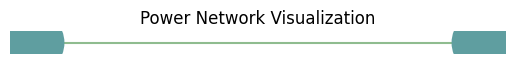

In [15]:
# Visualize the network

import matplotlib.pyplot as plt
network.plot()
plt.title("Power Network Visualization")
plt.show()

# Step 4: Solving the Network
PyPSA includes tools for solving network power flows and optimization problems.

## Power Flow Calculation
After setting up the network, calculate the power flow:
We will now solve the network to find the power flow, voltages at each bus, and the power transmitted through the lines.

In [ ]:
# Run the power flow calculation
network.lpf()  # Linear Power Flow (Faster)

print("-----------------")

network.pf()   # Full Power Flow (More accurate)

# Increase iterations for convergence

lpf(): Linear power flow is a faster but less accurate method for solving the power flow.

pf(): Full power flow is a more accurate method that takes into account nonlinearities in the system.

## Examine Power Flows

You can inspect the power flows on lines and outputs of generators:

In [ ]:
# Generator outputs
print(network.generators_t.p)

In [ ]:
# Power flows on lines
print(network.lines_t.p0)  # Power flow at the "from" end of lines
print(network.lines_t.p1)  # Power flow at the "to" end of lines

## Voltage Angles

To examine bus voltage angles:

In [ ]:
print(network.buses_t.v_ang)

# Step 4: Optimizing Dispatch
PyPSA can optimize generator dispatch to minimize costs:

Install a Solver

We will use the glpk solver. Alternatively, you can install other solvers like CPLEX or Gurobi if you need more advanced features or better performance. These solvers may require licenses.

In [ ]:
#!pip install swiglpk

In [ ]:
# Run the following code in Python to check if the solver is available:
import pyomo.environ as pyo
print(pyo.SolverFactory("glpk").available())

In [ ]:
network.optimize()

Generator Outputs:

In [ ]:
print(network.generators_t.p)
#This shows the power generated by each generator.

Line Flows:

In [ ]:
print(network.lines_t.p0)  # Power flow at the "from" end of lines
print(network.lines_t.p1)  # Power flow at the "to" end of lines

## Example 2: Add renewable generators (Solar Generator)

Add a solar generator at Bus 2
network.add(
    "Generator", 
    "Solar Generator", 
    bus="Bus 2", 
    p_nom=50, 
    p_set=30, 
    marginal_cost=0, 
    control="PQ"
)

bus="Bus 2",                     # Connect to Bus 2
p_nom=50,                        # Maximum capacity of 50 MW
p_max_pu=pd.Series([0.8],        # 80% of capacity available
index=network.snapshots),
marginal_cost=0)                 # Zero marginal cost (no fuel costs)

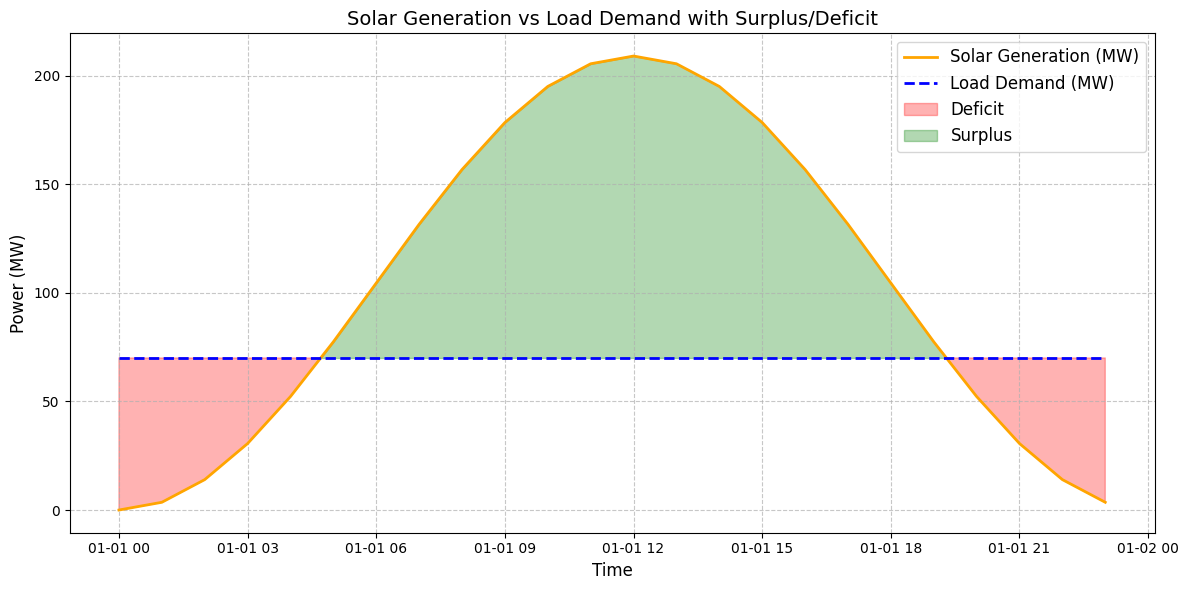

In [21]:
# Example 2 : Load - Solar Generator
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the network
network = pypsa.Network()

# Add Buses
network.add("Bus", "bus1", carrier="DC")  # DC side (solar generator to inverter)
network.add("Bus", "bus2", carrier="AC")  # AC side (inverter to load)


# Define time steps for the simulation
hours = pd.date_range("2023-01-01 00:00", "2023-01-01 23:00", freq="H")
network.set_snapshots(hours)

# Generate a realistic solar profile
solar_profile = pd.Series(0.5 * (1 + np.sin(2 * np.pi * (hours.hour - 6) / 24)), index=network.snapshots)
# Peaks around midday
      
# Add Solar Generator
p_nom_solar = 220  # Nominal power (MW)
network.add("Generator","Solar Generator",bus="bus1",p_nom=p_nom_solar, p_max_pu=solar_profile,  carrier="solar")


# Add Inverter (as a link)
inverter_efficiency = 0.95
network.add("Link", "Inverter",bus0="bus1",bus1="bus2",p_nom=p_nom_solar,efficiency=inverter_efficiency,carrier="inverter")


# Define constant load demand
p_load = 70  # Load demand in MW
load_demand = pd.Series(p_load, index=network.snapshots)  # Constant across all snapshots

# Add Load
network.add("Load", "Load",bus="bus2", p_set=load_demand)  



# Calculate solar generation at each time step (after inverter losses)
solar_generation = solar_profile * p_nom_solar * inverter_efficiency

# Combined Plot: Solar Generation and Load Demand with Highlighted Surplus/Deficit
plt.figure(figsize=(12, 6))

# Plot Solar Generation
plt.plot(hours, solar_generation, label="Solar Generation (MW)", color="orange", linewidth=2)

# Plot Load Demand
plt.plot(hours, load_demand, label="Load Demand (MW)", color="blue", linestyle="--", linewidth=2)

# Highlight Deficit (When Solar is Insufficient)
plt.fill_between(hours, solar_generation, load_demand, where=(solar_generation < load_demand), 
                 interpolate=True, color="red", alpha=0.3, label="Deficit")

# Highlight Surplus (When Solar is Excessive)
plt.fill_between(hours, solar_generation, load_demand, where=(solar_generation >= load_demand), 
                 interpolate=True, color="green", alpha=0.3, label="Surplus")

# Labels, Legend, and Grid
plt.title("Solar Generation vs Load Demand with Surplus/Deficit", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Power (MW)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the Plot
plt.show()


# Adding Storage Unit

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.53s
INFO:pypsa.linopf:Solve linear problem using Glpk solver
INFO:pypsa.linopf:Optimization successful. Objective value: 0.00e+00


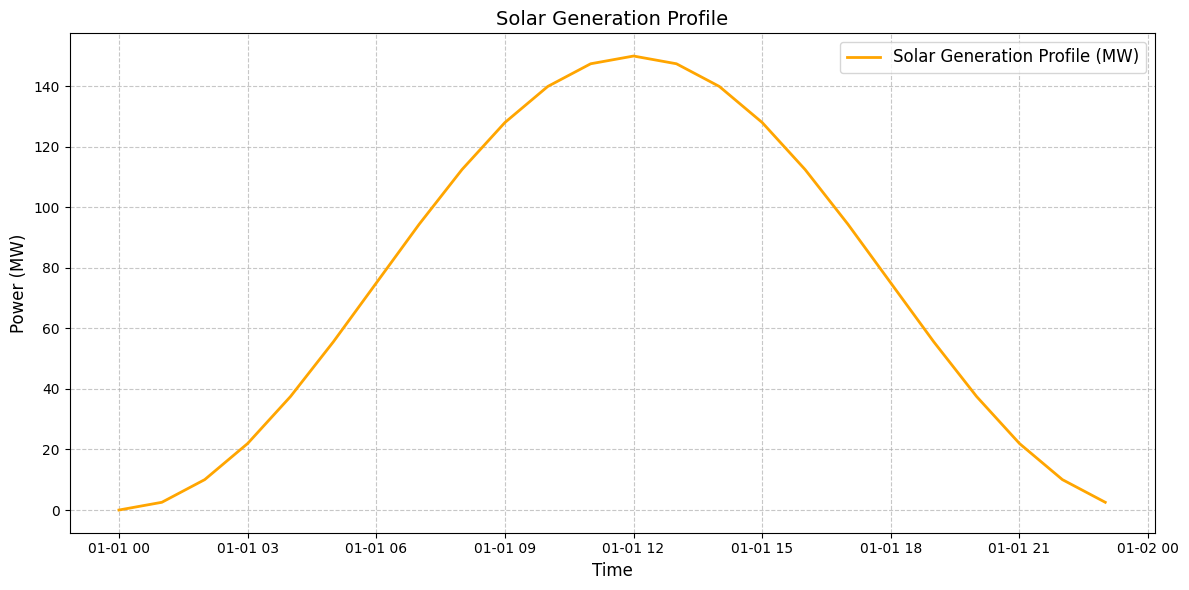

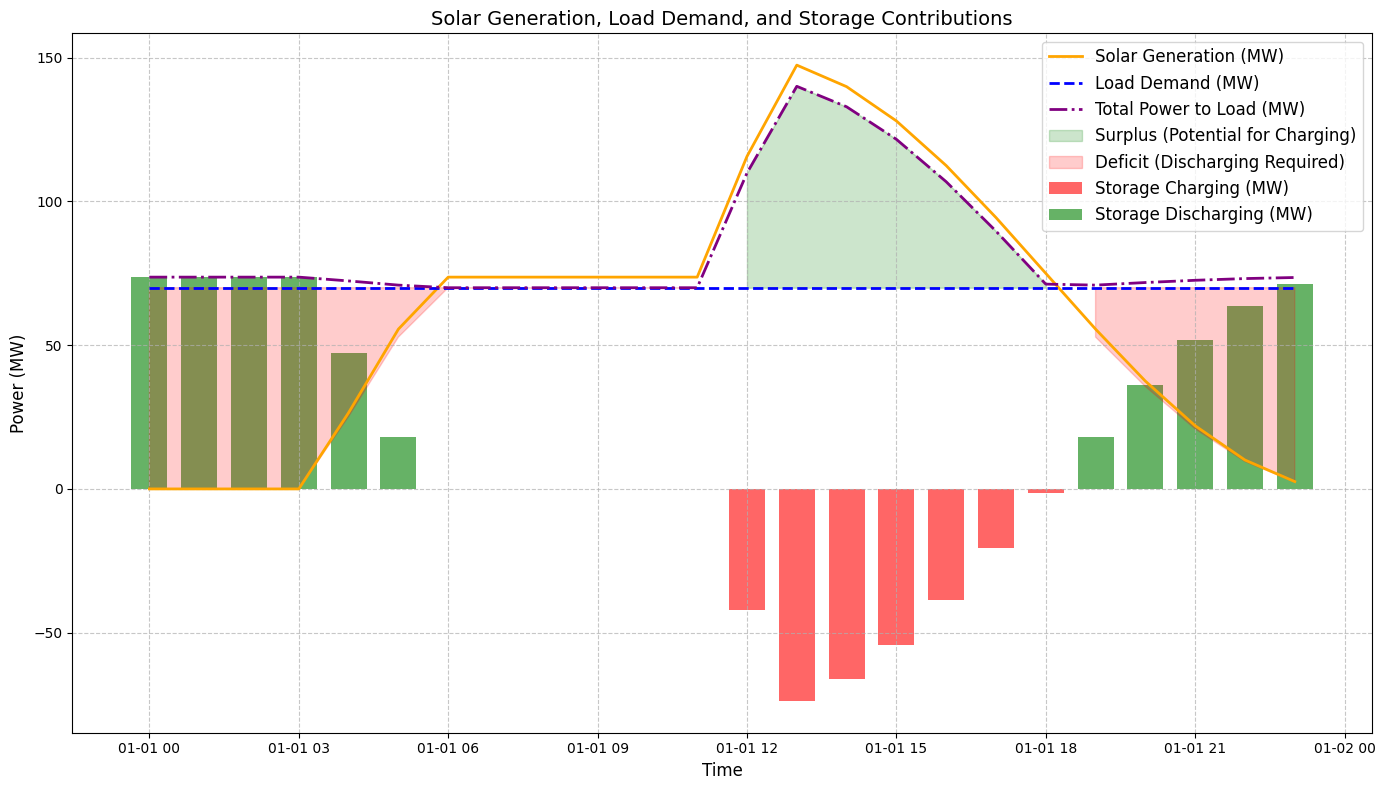

In [2]:
# Example 3 : Load - Solar Generator + Storage Unit
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the network
network = pypsa.Network()

# Add Buses
network.add("Bus", "bus1", carrier="DC")  # DC side (solar generator to inverter)
network.add("Bus", "bus2", carrier="AC")  # AC side (inverter to load)

# Define time steps for the simulation
hours = pd.date_range("2023-01-01 00:00", "2023-01-01 23:00", freq="H")
network.set_snapshots(hours)

# Generate a realistic solar profile
solar_profile = pd.Series(0.5 * (1 + np.sin(2 * np.pi * (hours.hour - 6) / 24)), index=network.snapshots)
# Peaks around midday

# Add Solar Generator
p_nom_solar = 150  # Nominal power (MW)
network.add("Generator", "Solar Generator", bus="bus1", p_nom=p_nom_solar, p_max_pu=solar_profile, carrier="solar")

# Add Inverter (as a link)
inverter_efficiency = 0.95
network.add("Link", "Inverter", bus0="bus1", bus1="bus2", p_nom=p_nom_solar * 2, efficiency=inverter_efficiency, carrier="inverter")

# Define constant load demand
p_load = 70  # Load demand in MW
load_demand = pd.Series(p_load, index=network.snapshots)

# Add Load
network.add("Load", "Load", bus="bus2", p_set=load_demand)

# Add Storage Unit
network.add(
    "StorageUnit",
    "Battery Storage",
    bus="bus1",
    p_nom=200,
    max_hours=4,
    efficiency_store=0.9,
    efficiency_dispatch=0.9,
    state_of_charge_initial=400,
    carrier="battery"
)

# Solve the network using linear optimal power flow
network.lopf(network.snapshots)

# Extract results for storage and solar generation
storage_dispatch = network.storage_units_t.p["Battery Storage"]  # Charging (negative) and discharging (positive)
solar_generation = network.generators_t.p["Solar Generator"]  # Solar generation before inverter

# Total power delivered to the load (solar after inverter + battery discharge)
solar_to_load = solar_generation * inverter_efficiency  # Solar power after inverter losses
battery_to_load = storage_dispatch.clip(lower=0)  # Only discharging
total_power_to_load = solar_to_load + battery_to_load

# Separate charging and discharging for clarity
storage_charging = storage_dispatch.clip(upper=0)  # Negative values (charging)
storage_discharging = battery_to_load  # Positive values (discharging)

# Plot 1: Solar Generation Profile
plt.figure(figsize=(12, 6))
plt.plot(hours, solar_profile * p_nom_solar, label="Solar Generation Profile (MW)", color="orange", linewidth=2)
plt.title("Solar Generation Profile", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Power (MW)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Plot 2: Combined Plot
plt.figure(figsize=(14, 8))

# Plot Solar Generation and Load Demand
plt.plot(hours, solar_generation, label="Solar Generation (MW)", color="orange", linewidth=2)
plt.plot(hours, load_demand, label="Load Demand (MW)", color="blue", linestyle="--", linewidth=2)

# Overlay Storage Charging and Discharging
plt.bar(hours, storage_charging, label="Storage Charging (MW)", color="red", alpha=0.6, width=0.03)
plt.bar(hours, storage_discharging, label="Storage Discharging (MW)", color="green", alpha=0.6, width=0.03)

# Add the combined power to the load
plt.plot(hours, total_power_to_load, label="Total Power to Load (MW)", color="purple", linestyle="-.", linewidth=2)

# Add vertical shading for surplus and deficit regions
plt.fill_between(
    hours,
    solar_to_load,
    load_demand,
    where=(solar_to_load > load_demand),
    color="green",
    alpha=0.2,
    label="Surplus (Potential for Charging)"
)
plt.fill_between(
    hours,
    solar_to_load,
    load_demand,
    where=(solar_to_load < load_demand),
    color="red",
    alpha=0.2,
    label="Deficit (Discharging Required)"
)

# Labels, Legend, and Grid
plt.title("Solar Generation, Load Demand, and Storage Contributions", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Power (MW)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the combined plot
plt.show()
